**Dataset Citation**

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


In [6]:
import pandas as pd
import numpy as np


In [7]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

**Describe the Dataset**

Data Set Information:

The dataset is related to the white variant of the Portuguese "Vinho Verde" wine and were collected from May, 2004 to February, 2007 using only protected designation of origin samples that were tested at the official certification entity. Regarding the preferences, each sample was evaluated by a minimum of three sensory assessors (using blind tastes), which graded the wine in a scale that ranges from 0 (very bad) to 10 (excellent). The final sensory score is given by the median of these evaluations.

For more details, consult: the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. 


Attributes Information:

>1 - Fixed acidity:
     Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

>2 - Volatile acidity:
    The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

>3 - Citric acid:
    Tound in small quantities, citric acid can add 'freshness' and flavor to wines


>4 - Residual sugar:
    The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet


> 5 - Chlorides:
    The amount of salt in the wine
    
    
> 6 - Free sulfur dioxide:
    The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

> 7 - Total sulfur dioxide:
    Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

> 8 - Density:
    The density of water is close to that of water depending on the percent alcohol and sugar content

> 9 - pH: 
    Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)

> 10 - Sulphates:
    A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

> 11 - Alcohol:
    Percentage of the alcohol in the wine

> 12 - quality:
    A scale that ranges from 0 (very bad) to 10 (excellent) which tested by human sensory tasting.

**Load the Dataset**

In [8]:
wine_df = pd.read_csv('Data/winequality-white.csv', sep=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Explore the Dataset**

In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


**Initial Thoughts**
- This dataset is very clean and organized (0 missing values and well labeled column names)
- Majority of the wines have total sulfur dioxide ranging from 110 to 160 
- Most wines have residual sugar in the range of 2 to 10 
- Most wines are between 3-4 on the pH scal, in this dataset the mean pH is around 3.2
- Most wines are in the middle range (6 -7) of quality
- Quality can be used as an ordinal variable (7 levels from 3 to 9 in this dataset) 

**Data Wrangling**

As the dataset does not have any units for each of the variables. According to the article 'Modeling wine preferences by data mining from physicochemical properties' [Cortez et al., 2009], units can be added for each column of the dataset for further analysis. Furthermore, for more concise analysis, we bucket ***quality*** to a new variable named ***Taste***. Since 6 is the overall mean, we assign 6 as 'average' quality, scale below 6 as 'bad', and above 6 as 'good' classify the quality of wine.

In [13]:
wine_df.loc[0] = ['g/dm3','g/dm3','g/dm3','g/dm3','g/dm3','mg/dm3','mg/dm3','g/cm3', np.nan,'g/dm3','%vol', np.nan]
wine_df.to_csv('wine_new.csv', index=False)

In [14]:
wine = pd.read_csv('Data/wine_new.csv', header=[0,1])
wine.columns = wine.columns.map(' in '.join)
wine = wine.rename(columns = {'pH in Unnamed: 8_level_1':'pH', 'quality in Unnamed: 11_level_1':'quality'})
wine['Taste'] = np.where(wine['quality']<6, 'Bad', (np.where(wine['quality']>6.5, 'Good', 'Average')))
wine.head()

wine.to_csv('wine_dash.csv', index=False)

In [15]:
pwd()

'C:\\Users\\ebaxt\\Documents\\Masters\\block5\\551\\dashboard-project-data551_group8'

**Basic Research Questions**

- What is the correlation between each pair of variables in the dataset?
- What is the distriution of each measurement regarding wine quality?
- How does the alcohol in percentage volumn change with the the quality of wine?
- What are the differences between the three main quality levels regarding their pH measurements?
- How do the concentrations of total and free sulfur dioxide differ for different quality levels?
- What impact do the volatile acidity and citric acid have on the wine quality? 

**Data Analysis & Visualizations**

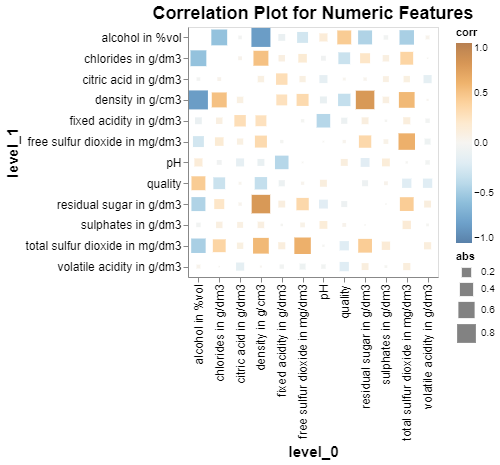

In [16]:
corr_df = wine.select_dtypes('number').corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0
corr_df['abs'] = corr_df['corr'].abs()
alt.Chart(corr_df,title="Correlation Plot for Numeric Features").mark_square().encode(
    x='level_0',
    y='level_1',
    size='abs',
    color=alt.Color('corr', scale=alt.Scale(scheme='blueorange', domain=(-1, 1))),
    tooltip=alt.Tooltip('corr')).configure_axis(
    labelFontSize=12,
    titleFontSize=15
).configure_title(fontSize=18).properties(height=250, width=250)

Density is negatively correlated with alcohol (-0.821) and positively correlated with residual sugar(0.78). Total sulphur dioxide and chlorides are some degreed positively correlated with a density as well. Also, total sulphur dioxide and free sulphur dioxide have positive association.

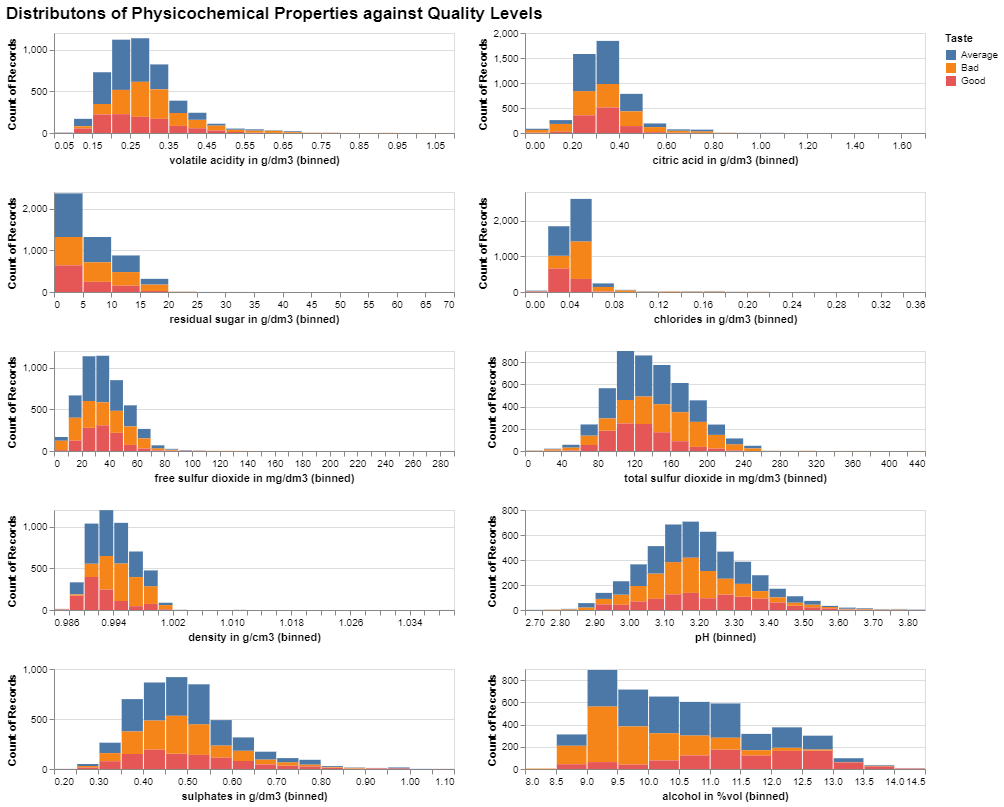

In [17]:
col = list(wine.select_dtypes(include ='number').columns.values)[1:]
col.remove('quality')

alt.Chart(wine).mark_bar().encode(
    x=alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()'),
    color='Taste'
).properties(
    height=100
).repeat(repeat=col, columns=2,title="Distributons of Physicochemical Properties against Quality Levels").configure_title(fontSize=17)


As we can see above, the average and bad types of wine are generally shared a similar distribution, whereas the good type wine is a bit more left-skewed in chemical variables, except in alcohol and pH; The good wine tends to have higher alcohol percentage and higher pH value, and the distribution of good type wine has deviated from the average and bad type lets look at it more closely.

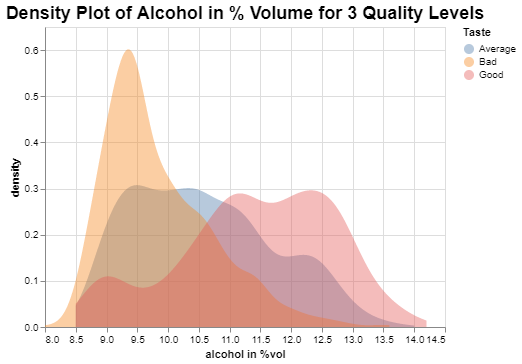

In [18]:
# alcohol %

alt.Chart(wine,title="Density Plot of Alcohol in % Volume for 3 Quality Levels").transform_density(
     'alcohol in %vol',
     groupby=['Taste'],
     as_=['alcohol in %vol', 'density'],
     steps=200).mark_area(opacity=0.4).encode(
     x='alcohol in %vol:Q',
     y='density:Q',
     color='Taste').configure_title(fontSize=18)

Clearly, from the density plot of alcohol, the distribution of each quality of the wine is quite different. The bad quality wine has concentrated around 9% whereas the good quality wine is more concentrated around 12.5%.


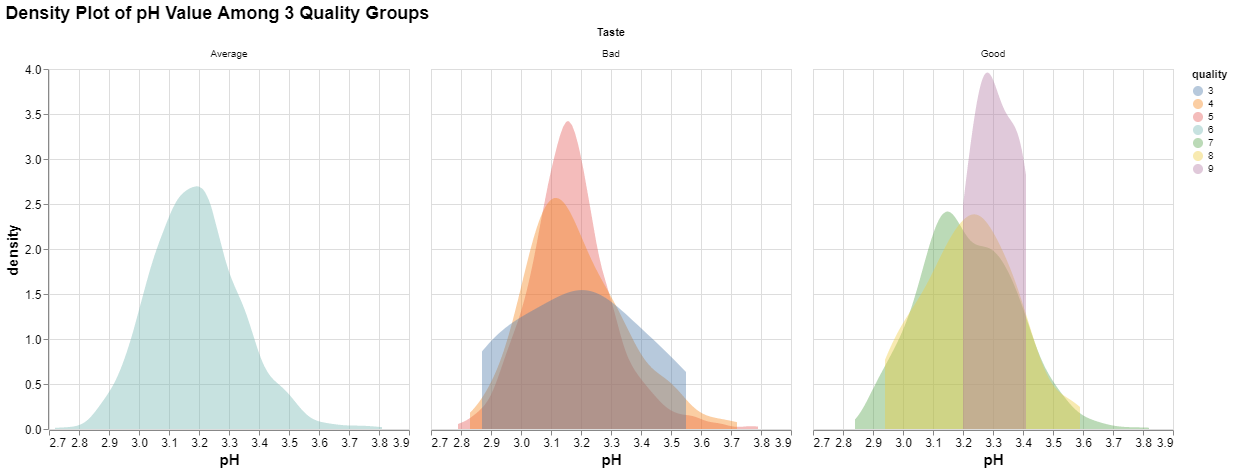

In [19]:
# pH

alt.Chart(wine).transform_density(
     'pH',
     groupby=['quality', 'Taste'],
     as_=['pH', 'density']).mark_area(opacity=0.4).encode(
     x='pH',
     y='density:Q',
     color='quality:N').properties(
     width=360,
     height=360
).facet('Taste',title="Density Plot of pH Value Among 3 Quality Groups"
).configure_title(fontSize=18
).configure_axis(
    labelFontSize=12,
    titleFontSize=15
)

One thing should be noticed from the graph is the super good quality wine has higher pH value it peaked at 3.3 whereas the bad and average wine peaked at 3.15

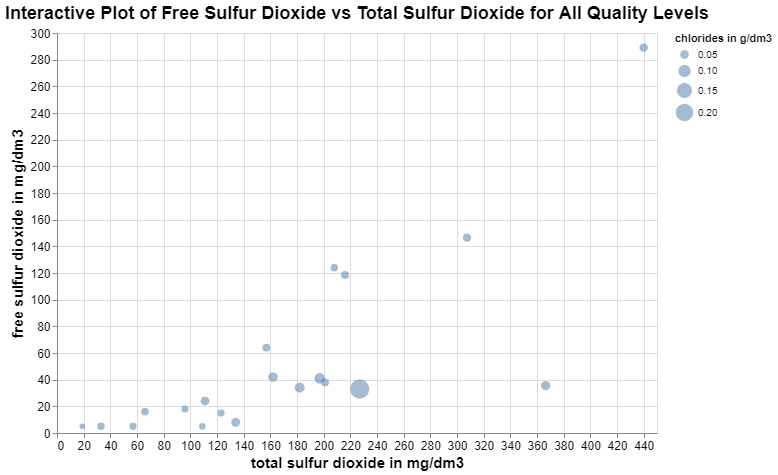

In [20]:
# Chemical

select_quality = alt.selection_single(
    name='Select', fields=['quality'], init={'quality': 3.0},
    bind=alt.binding_range(min=3.0, max=9.0, step=1.0))

alt.Chart(wine,title="Interactive Plot of Free Sulfur Dioxide vs Total Sulfur Dioxide for All Quality Levels").mark_circle(opacity=0.5).encode(
    alt.X('total sulfur dioxide in mg/dm3'),
    alt.Y('free sulfur dioxide in mg/dm3'),
    alt.Size('chlorides in g/dm3'),
    alt.OpacityValue(0.5)
).add_selection(select_quality).transform_filter(select_quality
).properties(height=400, width=600).interactive().configure_title(fontSize=18
).configure_axis(
    labelFontSize=12,
    titleFontSize=15)


According to the plot, we can observe that as the quality of wine improves, the concentrations of both free sulfur dioxide and total sulfur dioxide decrease. The total sulfur dioxide for the bad and average wines mostly range from 120 to 240 mg/dm3, while the majority of concentration for good wines are in the range from 60 to 160 mg/dm3. Also, the size of the circles is indicating the concentration of chlorides, and we can see that majority of the bad and average wines have lower contents of chlorides comparing to the good ones.

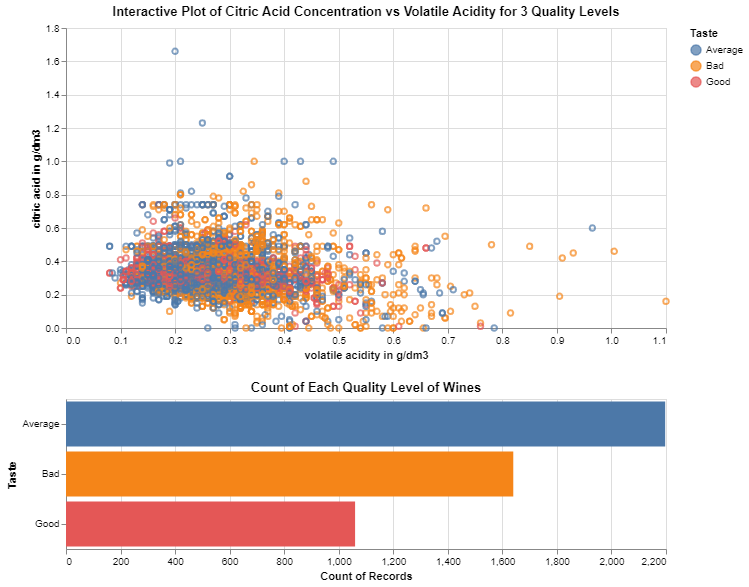

In [21]:
# Acids

brush = alt.selection_interval()

points = alt.Chart(wine,title="Interactive Plot of Citric Acid Concentration vs Volatile Acidity for 3 Quality Levels").mark_point().encode(
    alt.X('volatile acidity in g/dm3', scale=alt.Scale(zero=False)),
    alt.Y('citric acid in g/dm3', scale=alt.Scale(zero=False)),
    color=alt.condition(brush, 'Taste:N', alt.value('lightgray'))
).add_selection(brush).properties(height=300, width=600)

bars = alt.Chart(wine,title="Count of Each Quality Level of Wines").mark_bar().encode(
    y='Taste:N',
    color='Taste:N',
    x='count(Taste):Q',
    tooltip='count(Taste):Q',
).transform_filter(brush).properties(height=150, width=600)

points & bars

The rectangular area where the citric acid in the range of 0.25 to 0.4 and volatile acidity range of 0.1 to 0.13 the count of good quality wine is greater than the average and bad wines, by contrast, when the volatile acidity is greater than 0.4, the number of bad wine are much higher than the good and average wine.

Wine quality is negatively correlated with the volatile acidity as high level of volatile acidity leads to vinegary taste. Thus we can observe from the chart that most good wines locate in the range of low volatile acidity and citric acid content from 0.25 to 0.4 g/dm3, as the bad and average wines are crowded in the higher level of volatile acidity ranges. 

**Summary and Conclusions**

>- Average and bad wines tend to have a similar distribution for most physicochemical properties, while good wines have a different distribution.
>- Alcohol percentage is positively correlated with wine quality. Good wine tends to have a higher alcohol percentage compare to the average and bad wine.
>- Citric acid could add 'freshness' and flavor to wines but too much acid tends to decrese the wine quality.
>- Volatile acidity have negative effect on the wine quality as bad and average tend to have higher amount while good wines have lower concentrations.
>- Sulphur Dioxide are most common preservative used in the wine, but high level of sulphur dioxide might lead to unpleasant taste of the wine.
>- Lower pH value is also correlated with better quality of wine, which also can be proven that higher alcohol leads to higher level of quality.

**Follow-Up Research Questions**

- 1. Do the grape type and growing temperature affect the wine quality? Additional data will be required for further study, the potential hypothetical data could be,the grape type and temperature.
- 2. Which features among these 11 are the most indicative of a good quality wine? (modelling)